In [4]:
import numpy as np
from astropy.io import ascii
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
trimmed15 = 'MESA-Web_Job_0320100813/trimmed_history.data' #15 solar masses
trimmed8 = 'MESA-Web_Job_0320100857/trimmed_history.data' #8 solar masses
trimmed3 = 'MESA-Web_Job_0320100916/trimmed_history.data' #.
trimmed1 = 'MESA-Web_Job_0320100939/trimmed_history.data' #.
trimmedpt5 = 'MESA-Web_Job_0320101029/trimmed_history.data' #.

In [6]:
mass_all = np.zeros(5)
logR_all = np.zeros(5)
logL_all = np.zeros(5)

In [7]:
def get_ZAMS_params(file):
    hist = np.loadtxt(file, skiprows = 6)
    HI = hist[:,9]
    mass = hist[:,2]
    logL = hist[:,3]
    logR = hist[:,4]
    flag = (HI[0]-HI>3E-3)
    #index where hydrogen in core starts decreasing
    first_fusion = np.where(flag)[0][0]
    print(first_fusion)
    return mass[first_fusion], logL[first_fusion], logR[first_fusion]

In [8]:
file_list = [trimmedpt5, trimmed1, trimmed3, trimmed8, trimmed15]
for i in range(len(file_list)):
    mass_all[i], logL_all[i], logR_all[i], = get_ZAMS_params(file_list[i])    
    
#Below indices are printed from lowest to greatest mass
#corresponding profile numbers from profiles.index files are:
#for .5:17
#for 1: 17
#for 3: 20
#for 8: 20
#for 15: 21

763
776
909
907
949


[ 0.69863393 -0.08617148]


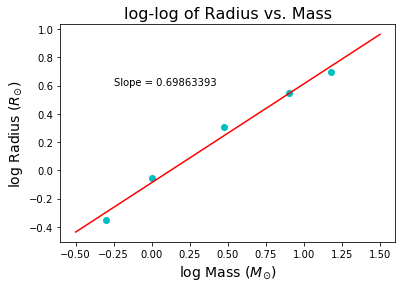

In [11]:
f = np.polyfit(np.log10(mass_all), logR_all, 1)

x = np.linspace(-0.5, 1.5, 1000)
v = np.polyval(f,x)
plt.plot(np.log10(mass_all), logR_all, 'co') #log log radius v mass
plt.title('log-log of Radius vs. Mass', fontsize = 16)
plt.xlabel('log Mass ($M_{\odot}$)', fontsize = 14)
plt.ylabel('log Radius ($R_{\odot}$)', fontsize = 14)
plt.plot(x,v,'r',label = 'Best fit')
print(f)
plt.text(-.25, .6, 'Slope = 0.69863393')

The accepted value for the slope of the mass-radius relation is 0.8, which our slope is close to source: David Darling

[ 3.89611973 -0.14562752]


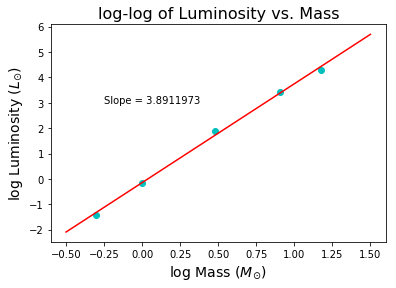

In [12]:
f = np.polyfit(np.log10(mass_all), logL_all, 1)
v = np.polyval(f,x)
x = np.linspace(-0.5, 1.5, 1000)
plt.plot(np.log10(mass_all), logL_all, 'co') #log log Luminosity v mass
plt.title('log-log of Luminosity vs. Mass', fontsize = 16)
plt.xlabel('log Mass ($M_{\odot}$)', fontsize = 14)
plt.ylabel('log Luminosity ($L_{\odot}$)', fontsize = 14)
plt.plot(x,v,'r',label = 'Best fit')
print(f)
plt.text(-.25, 3, 'Slope = 3.8911973')

The accepted value for the mass luminosity relation is 3.5 for main sequence stars, which our value is again close to (Hyperphysics).

In [13]:
trimmed15profs = 'MESA-Web_Job_0320100813/profile21.data'
trimmed8profs = 'MESA-Web_Job_0320100857/profile20.data'
trimmed3profs = 'MESA-Web_Job_0320100916/profile20.data'
trimmed1profs = 'MESA-Web_Job_0320100939/profile17.data'
trimmedpt5profs = 'MESA-Web_Job_0320101029/profile17.data'
M15, R15, L15, P15, logT15 = np.loadtxt(trimmed15profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)
M8, R8, L8, P8, logT8 = np.loadtxt(trimmed8profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)
M3, R3, L3, P3, logT3 = np.loadtxt(trimmed3profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)
M1, R1, L1, P1, logT1 = np.loadtxt(trimmed1profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)
Mpt5, Rpt5, Lpt5, Ppt5, logTpt5 = np.loadtxt(trimmedpt5profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)

(0, 1)

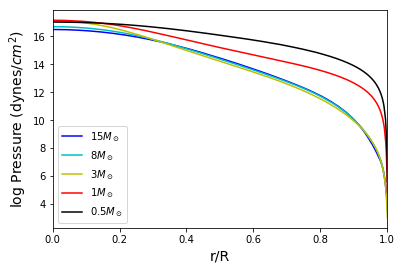

In [23]:
#P vs r/R
plt.figure()
plt.plot(R15/max(R15),np.log10(P15),'b-',label = '15$M_\odot$')
plt.plot(R8/max(R8),np.log10(P8),'c-',label = '8$M_\odot$')
plt.plot(R3/max(R3),np.log10(P3),'y-',label = '3$M_\odot$')
plt.plot(R1/max(R1),np.log10(P1),'r-',label = '1$M_\odot$')
plt.plot(Rpt5/max(Rpt5),np.log10(Ppt5),'k-',label = '0.5$M_\odot$')
plt.xlabel('r/R',fontsize = 14)
plt.ylabel('log Pressure (dynes/$cm^2$)', fontsize = 14)
plt.legend()
plt.xlim(0,1)

(0, 1)

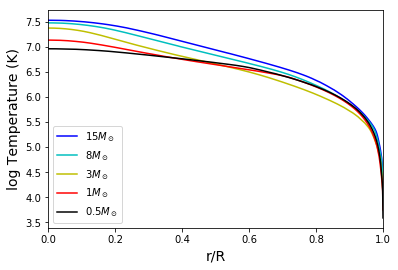

In [21]:
#T vs r/R
plt.figure()
plt.plot(R15/max(R15),logT15,'b-',label = '15$M_\odot$')
plt.plot(R8/max(R8),logT8,'c-',label = '8$M_\odot$')
plt.plot(R3/max(R3),logT3,'y-',label = '3$M_\odot$')
plt.plot(R1/max(R1),logT1,'r-',label = '1$M_\odot$')
plt.plot(Rpt5/max(Rpt5),logTpt5,'k-',label = '0.5$M_\odot$')
plt.xlabel('r/R', fontsize = 14)
plt.ylabel('log Temperature (K)',fontsize = 14)
plt.legend(loc='lower left')
plt.xlim(0,1)

The last two plots were interesting, pressure vs. radius was not at all what i had expected. I expected for higher mass stars to have higher pressures. The opposite is true, actually, lower mass stars have higher pressures, according to the MESA profiles corresponding to the start of fusion in these stars (so the "only" elements in the star should be hydrogen, and maybe a bit of helium. The reason for this may be that because of their high mass, larger stars have to stay less compact to not become unstable (guessing here). Both curves show a quick decreases in pressure and temperature at around 0.9 radii of the star where the density drops off tremendously. 